# Extraction de connaissances à partir de données structurées et non structurées

## Séance 5 : Application sur données réelles


## Différences façons d'écrire les chiffres

Dans cette séance, nous voyons l'application de l'ACP pour rechercher les différentes façons d'écrire chaque chiffre.

In [1]:
import numpy
import pandas
import matplotlib.pyplot as plt

%matplotlib inline

Nous allons utiliser les données pendigits de l'UCI Machine Learning Repository. Ces données représentent le tracé des chiffres de 0 à 9 par plusieurs personnes. Pour chaque tracé, nous n'avons au final que les coordonnées $(X, Y)$ de 8 points et le chiffre tracé.

Voici ci dessous comment importer les données directement.

In [2]:
pen_tes = pandas.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/pendigits/pendigits.tes", 
                          header=None)
pen_tra = pandas.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/pendigits/pendigits.tra", 
                          header=None)
pen = pandas.concat([pen_tra, pen_tes], ignore_index = True)
print(pen.shape)
pen.head()

(10992, 17)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1


Comme vous le pouvez le remarquer, les noms des variables ne sont pas renseignés. Celles-ci sont $(x_i, y_i)_{i=1,\ldots,8}$ et le chiffre. On va donc déjà créer le vecteur correspondant.

In [3]:
a = [c + n for c, n in zip(["x", "y"] * 8, [str(x) for x in range(1, 9) for i in range(2)])]
a.append("chiffre")
print(a)

['x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4', 'x5', 'y5', 'x6', 'y6', 'x7', 'y7', 'x8', 'y8', 'chiffre']


On va ensuite renommer les colonnes avec ce vecteur.

In [4]:
pen.columns = a
pen.head()

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,chiffre
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1


Par la suite, nous aurons besoin d'accéder aux $x_j$ uniquement, ou aux $y_j$, voire aux deux. Nous créons donc des vecteurs avec les noms de variables.

In [5]:
xN = ["x" + str(i + 1) for i in range(8)]
print(xN)
yN = ["y" + str(i + 1) for i in range(8)]
print(yN)
xyN = [a + b for a,b in zip(["x", "y"] * 8, [str(i + 1) for i in range(8) for j in range(2)])]
print(xyN)

['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']
['y1', 'y2', 'y3', 'y4', 'y5', 'y6', 'y7', 'y8']
['x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4', 'x5', 'y5', 'x6', 'y6', 'x7', 'y7', 'x8', 'y8']


Ces données ont l'avantage d'être graphique. Nous allons donc représenter le premier tracé, qui est un $8$.

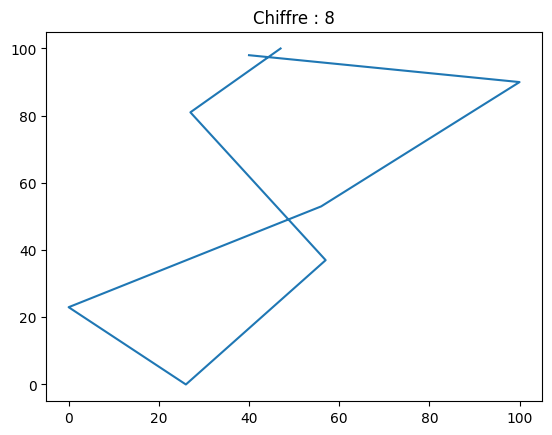

In [6]:
x = pen.loc[0, xN]
y = pen.loc[0, yN]

chiffre = pen.loc[0, "chiffre"]
plt.plot(x, y)
plt.title("Chiffre : " + str(chiffre))
plt.show()

Nous allons régulièrement utiliser ce code, donc nous allons le stocker dans une fonction nommée `dessin()`. Dans celle-ci, nous allons mettre en paramètre les $x_j$ et les $y_j$, le chiffre, ainsi qu'un graphique dans lequel nous allons mettre le dessin. Ceci nous sera utile pour faire plusieurs représentations de chiffres.

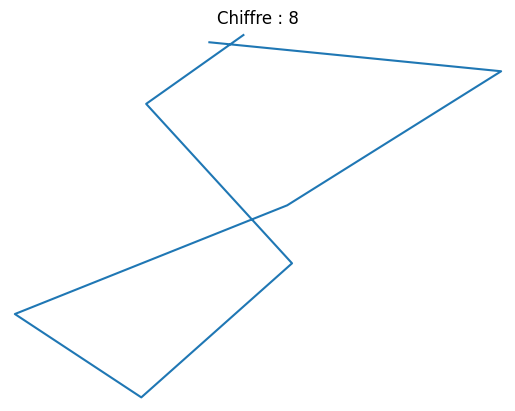

In [7]:
def dessin(p, x, y, chiffre):
    p.plot(x, y)
    p.set_title("Chiffre : " + str(chiffre))
    p.axis("off")
    p.set_xlim([-1, 101])
    p.set_ylim([-1, 101])

fig, ax = plt.subplots()
dessin(ax, x, y, chiffre)

Ensuite, nous créons une liste de `DataFrame`, un pour chaque chiffre. La fonction `query()` permet donc de sélectionner des lignes d'un `DataFrame` en fonction d'une condition (ici, `chiffre` égal 0, 1, ..., 9). Pour éviter les problèmes d'index plus tard, nous devons les réinitialiser pour chaque `DataFrame`, avec la fonction `reset_index()`, en mettant `drop` à vrai. Ceci permet d'oublier les numéros de ligne du `DataFrame` global et que ceux-ci recommencent de 0 pour chaque sous-ensemble.

In [8]:
sub = [pen.query("chiffre == " + str(i)).reset_index(drop = True) for i in range(10)]

Nous voulons maintenant représenter chaque premier exemple de chaque chiffre. Pour cela, nous recherchons la première ligne (`index = 0`) pour chaque sous-ensemble précédemment créé. Et pour simplifier le travail ensuite, nous renvoyons pour chaque chiffre, trois éléments : les $x_j$, les $y_j$ et le chiffre.

In [9]:
sub_first_xyc = [[s.loc[0, xN], s.loc[0, yN], s.loc[0, "chiffre"]] for s in sub]

Puis, nous créons une figure (en spécifiant la taille). Et pour chaque chiffre, nous ajoutons un graphique à la figure avec la fonction `add_subplot()`. Celle-ci prend trois paramètres : 

- le nombre de lignes, 
- le nombre de colonnes 
- et le numéro de placement du prochain graphique. 

Grâce à l'utilisation de la fonction `dessin()` et de l'objet `subxyc`, la réalisation est simple.

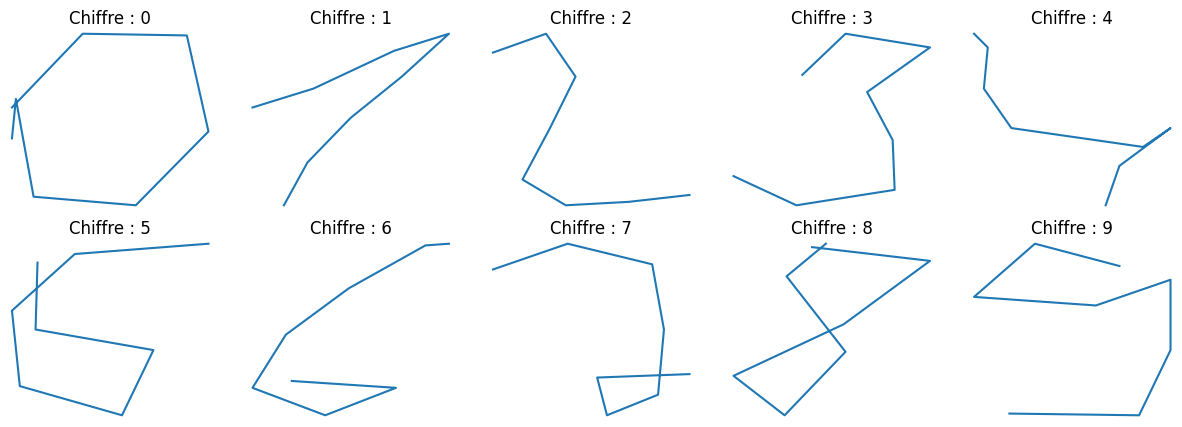

In [10]:
fig = plt.figure(figsize = (15, 5))
for i in range(10):
    ax = fig.add_subplot(2, 5, i + 1) # on ajoute un sous-graphique à la position i+1
    dessin(ax, sub_first_xyc[i][0], sub_first_xyc[i][1], sub_first_xyc[i][2])

Le but de ce TP va être de réfléchir à comment répondre à la question suivante :

> Existe-t'il plusieurs façons d'écrire chaque chiffre ?

Pour cela, nous allons dérouler les étapes suivantes :

- Calculer la moyenne de chaque coordonnée $x_j$ et $y_j$, pour chaque chiffre
- Représenter le tracé des chiffres moyens (i.e. en prenant les coordonnées moyennes donc)
- Améliorer éventuellement la fonction dessin() pour ajouter, si demandé, les numéros des points
- Réaliser une ACP sur les données (en comparant avec ou sans standardisation)
- Représenter les chiffres sur le plan factoriel
    - sur un seul graphique
    - avec un graphique par chiffre, sur la même figure

## Températures mondiales (anomalies)

Nous allons travailler ici sur les données de température mondiale HadCRUT4, fournies par [Climate Research Unit](https://crudata.uea.ac.uk/). Vous trouverez plus d’informations sur ces données sur ce lien. Nous avons ici plus exactement l'historique des anomalies moyennes mensuelles et annuelles depuis 1850, au niveau mondial, par rapport à la période de référence 1961-1990.

Le code ci-dessous télécharge directement les dernières données disponibles et les met dans un DataFrame dont vous avez un aperçu en dessous.

In [11]:
import pandas

had = pandas.read_csv("https://crudata.uea.ac.uk/cru/data/temperature/HadCRUT5.0Analysis_gl.txt", header=None)
donnees = pandas.DataFrame(
    [list(map(lambda v: float(v), filter(lambda v: v!= "", h.split(" ")))) for h in had[0][::2]],
    columns = ["Year", "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec", "Annual"]
)
donnees.tail()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
170,2020.0,1.069,1.113,1.094,1.063,0.908,0.825,0.816,0.801,0.867,0.811,1.014,0.693,0.923
171,2021.0,0.701,0.565,0.726,0.760,0.706,0.713,0.792,0.799,0.868,0.907,0.854,0.751,0.762
172,2022.0,0.779,0.764,0.890,0.770,0.761,0.858,0.778,0.853,0.790,0.929,0.675,0.768,0.801
173,2023.0,0.779,0.869,1.125,0.927,0.871,1.052,1.150,1.199,1.352,1.287,1.334,1.259,1.100
174,2024.0,1.152,1.290,1.251,1.205,1.075,1.115,1.138,1.245,-9.999,-9.999,-9.999,-9.999,1.184


Vous devez donc réaliser les étapes suivantes, au propre dans un notebook :

- Supprimer la dernière année, incomplète
- Décrire les données (statistiques de base sur chaque mois et sur l'année, corrélations entre les variables)
- Réprésenter l'évolution des anomalies annuelles sur un graphique
- Réaliser une ACP sur les données mensuelles
- Produire les graphiques nécessaires à l’interprétation
- Identifier des années particulières

Que peut-on dire globalement ?